## Stanford 1A toward all the cytometry data sets of the HIPC database

This notebook aims at presenting ${\tt CytOpt}$ results when the Stanford1A data set is used as a source data set and the rest of the HIPC database acts as target data sets. In this notebook we simply display the results using the ${\tt CytOpt}$ results stored in the file `Res_Estimation_Stan1A.txt`. One can reproduce these results using the notebook `CytOpt_More_Results`. We inform the reader that estimating the class proportions for the 61 data sets could last up to 24 hours.

##### Module and function imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import sys
sys.path.append("../Functions")
from Tools_CytOpt_Descent_Ascent import *
from Tools_CytOpt_MinMax_Swapping import *

In [3]:
#Setting of the seed.
np.random.seed(2)

In [4]:
sns.set()

##### CytOpt results import

In [5]:
#CytOpt estimation
Estimate_Prop = pd.read_csv('../Data/Results_Cytopt/Res_Estimation_Stan1A.txt',
                            index_col=0)
#Benchmark estimation
True_Prop = pd.read_csv('../Data/Results_Cytopt/True_proportion_Stan1A.txt',
                        index_col=0)

The data set Baylor1A is missing from our database. For the sake of simplicity, we used the data set Baylor1B instead. Therefore the results corresponding to the Baylor1B data set are duplicated. That is why we drop the Baylor1A results which correspond in fact to the Baylor1B data.

In [6]:
True_Prop = True_Prop.drop(['Baylor1A'])
Estimate_Prop = Estimate_Prop.drop(['Baylor1A'])

##### Benchmark proportions 

In [7]:
True_Prop.head()

,Classe 1,Classe 2,Classe 3,Classe 4,Classe 5,Classe 6,Classe 7,Classe 8,Classe 9,Classe 10
Yale1A,0.170959,0.187260,0.059817,0.083653,0.007900,0.000594,0.169863,0.228904,0.076621,0.014429
Ucla1A,0.162235,0.169979,0.085129,0.128977,0.017632,0.024629,0.180334,0.168346,0.052430,0.010309
Nhlbi1A,0.158828,0.198074,0.061755,0.106705,0.008710,0.001332,0.183523,0.231069,0.038768,0.011237
Cimr1A,0.162398,0.188765,0.026815,0.139418,0.006345,0.001739,0.224740,0.211332,0.031046,0.007403
Miami1A,0.014783,0.320575,0.115224,0.076835,0.010600,0.000630,0.153670,0.208617,0.081304,0.017762


##### Estimated proportions

In [8]:
Estimate_Prop.head()

,Classe 1,Classe 2,Classe 3,Classe 4,Classe 5,Classe 6,Classe 7,Classe 8,Classe 9,Classe 10
Yale1A,0.137202,0.239534,0.039231,0.080462,0.012508,0.003061,0.200852,0.191739,0.081544,0.013866
Ucla1A,0.254264,0.140054,0.053815,0.106684,0.021790,0.003222,0.148933,0.197308,0.060058,0.013873
Nhlbi1A,0.238419,0.160328,0.031940,0.096538,0.019145,0.002834,0.178759,0.166752,0.080009,0.025275
Cimr1A,0.184029,0.145849,0.049016,0.102554,0.017919,0.002251,0.195077,0.178034,0.088345,0.036926
Miami1A,0.051827,0.333219,0.095676,0.054683,0.034330,0.003687,0.129869,0.218720,0.050773,0.027216


In [9]:
Estimate_Prop = np.asarray(Estimate_Prop)
True_Prop = np.asarray(True_Prop)

##### Computation of the difference and the mean between ${\tt CytOpt}$ estimation and benchmark estimation

In [10]:
Diff_prop = True_Prop.ravel() - Estimate_Prop.ravel()
Mean_prop = (True_Prop.ravel() + Estimate_Prop.ravel())/2

#### Percentage of classes where the estimation error is below 5% and 10%

In [11]:
print('Percentage of classes where the estimation error is below 10%')
print(np.sum(abs(Diff_prop) < 0.1)/len(Diff_prop) * 100)
print('Percentage of classes where the estimation error is below 5%')
print(np.sum(abs(Diff_prop) < 0.05)/len(Diff_prop) * 100)

Percentage of classes where the estimation error is below 10%
99.672131147541
Percentage of classes where the estimation error is below 5%
93.60655737704919


##### Building of the dataframe to display the bland Altman bellow

In [12]:
Classes = np.tile(np.arange(1,11), 61)
Centre_1 = np.repeat(['Yale', 'UCLA', 'NHLBI', 'CIMR', 'Miami'], 10)
Centre_2 = np.repeat(['Standford', 'Yale', 'UCLA', 'NHLBI', 'CIMR', 'Baylor', 'Miami'], 10)
Centre = np.hstack((Centre_1, Centre_2, Centre_2, Centre_2,
                    Centre_2, Centre_2, Centre_2, Centre_2, Centre_2))

Patient1A = np.repeat(1,50)
Patient2 = np.repeat(2,70)
Patient3 = np.repeat(3,70)
Patient1 = np.repeat(1,70)

Patient = np.hstack((Patient1A, Patient2, Patient3, 
                     Patient1, Patient2, Patient3,
                     Patient1, Patient2, Patient3))

Dico_res = {'h_true' : True_Prop.ravel(), 'h_hat' : Estimate_Prop.ravel(),
            'Diff' : Diff_prop, 'Mean' : Mean_prop, 'Classe' : Classes,
           'Center' : Centre, 'Patient' : Patient}
df_res_Cytopt = pd.DataFrame(Dico_res)

In [13]:
df_res_Cytopt['Classe'] = df_res_Cytopt['Classe'].astype('object')

#### Computation of the standard deviation for the vector $(p_l-\hat{p_l})_{l \in L}$

In [14]:
sd_diff = np.std(Diff_prop)
print('Standard deviation:',sd_diff)

Standard deviation: 0.025754625488557902


### Bland-Altman plot

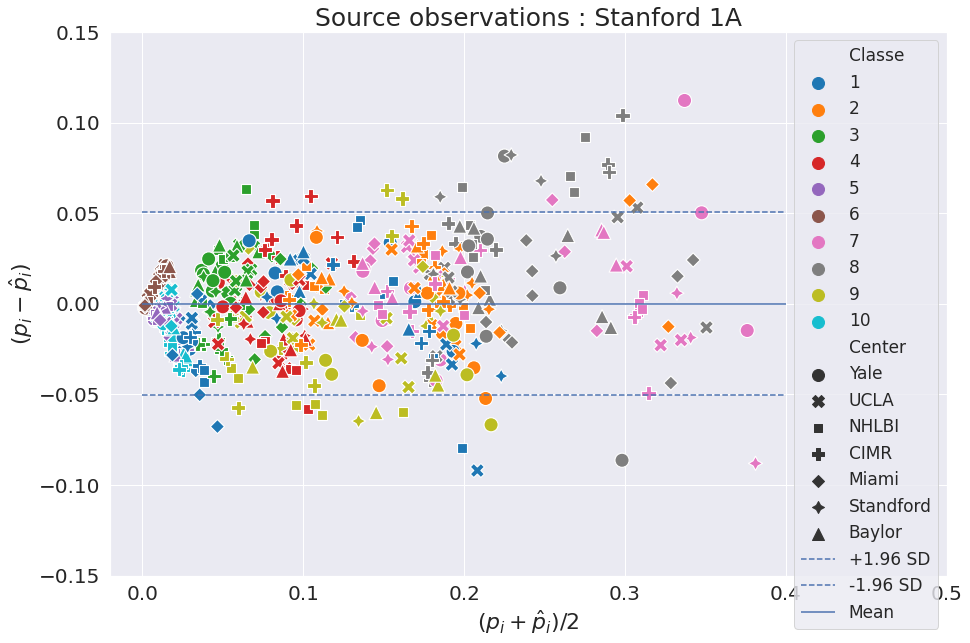

In [15]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Mean', y='Diff', hue='Classe', style='Center',
                palette= ['tab:blue', 'tab:orange', 'tab:green', 
                'tab:red', 'tab:purple', 'tab:brown', 'tab:pink',
                          'tab:gray', 'tab:olive', 'tab:cyan'], 
                s=200, data=df_res_Cytopt)
plt.xlabel(r'$(p_i + \hat{p}_i)/2$', size = 22)
plt.ylabel(r'$(p_i - \hat{p}_i)$', size = 22)
plt.xlim(-0.02,0.5)
plt.ylim(-0.15,0.15)
plt.xticks(size=20)
plt.yticks(size=20)
plt.hlines(1.96*sd_diff, xmin=0, xmax=0.4, linestyles='dashed', label = '+1.96 SD')
plt.hlines(-1.96*sd_diff, xmin=0, xmax=0.4, linestyles='dashed', label = '-1.96 SD')
plt.hlines(0, xmin=0, xmax=0.4, label = 'Mean')
plt.legend(fontsize=17, markerscale=2)
plt.title('Source observations : Stanford 1A', size = 25);
#plt.savefig('Band_Altman_plot_Stan.eps', format='eps')